locality
Aminabad                            4.900000
Hotel Clarks Amer, Malviya Nagar    4.900000
Friends Colony                      4.886916
Powai                               4.841869
Kirlampudi Layout                   4.820161
Express Avenue Mall,  Royapettah    4.800000
Deccan Gymkhana                     4.800000
Banjara Hills                       4.718762
Sector 5, Salt Lake                 4.707023
Riverside Mall, Gomti Nagar         4.700000


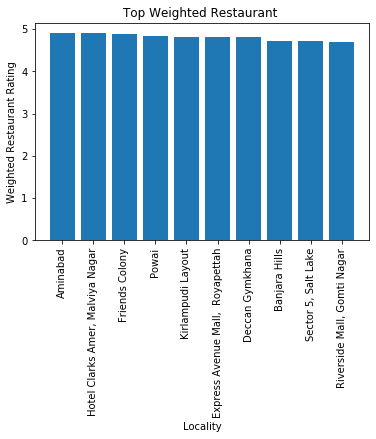

In [5]:
# 2.2
# Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
# Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
import pandas as pd
import matplotlib.pyplot as plt
a=pd.read_csv("Downloads/zomato.csv",encoding='ISO-8859-1')
df=a.copy()
df.columns=['res_id','res_name','code','city','address','locality','loc_verb','longitude','latitude','cuisines','avg_cost',
           'currency','has_table','online','is_delivering','switch_to','price_range','agg_rating','rating_color','rating_text',
           'votes']
dd=df.copy()
dd.describe()
# To find this i make a column "weighted" which is a product of votes and agg_rating and after that to find the answer
# weighted rating at a particular locality is divided by summision of votes at that locality

dd["weighted"]=dd['votes']*dd['agg_rating']
ind=dd[dd.code==1] # for Country India I find the weighted rating and after that find the top 10 restaurant rating locality
count=(ind.groupby("locality")["weighted"].sum()/ind.groupby("locality")["votes"].sum()).sort_values(ascending=False)[0:10]

locality = count.index.tolist()
value = count.values.tolist()
print(count.to_string(name=False,dtype=False))

plt.bar(locality,value)
plt.xticks(rotation=90)
plt.title("Top Weighted Restaurant ")
plt.xlabel("Locality")
plt.ylabel("Weighted Restaurant Rating")
plt.show()